In [2]:
import sys
sys.version

#!pip install tensorflow

(0, array([-0.09482212], dtype=float32), array([ 0.17146383], dtype=float32))


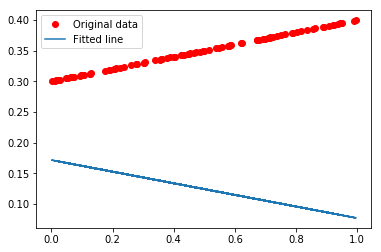

(20, array([ 0.04038223], dtype=float32), array([ 0.32921326], dtype=float32))


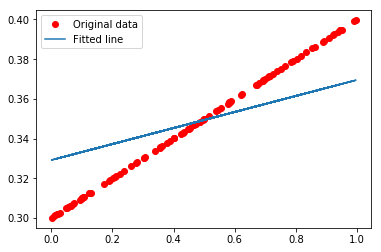

(40, array([ 0.06656724], dtype=float32), array([ 0.31638256], dtype=float32))


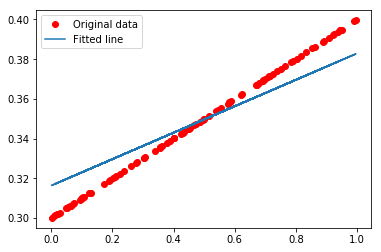

(60, array([ 0.08125136], dtype=float32), array([ 0.30918711], dtype=float32))


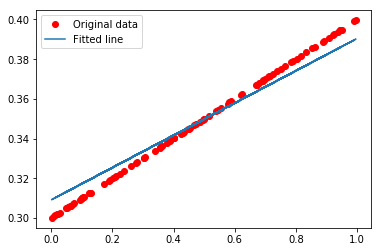

(80, array([ 0.08948603], dtype=float32), array([ 0.305152], dtype=float32))


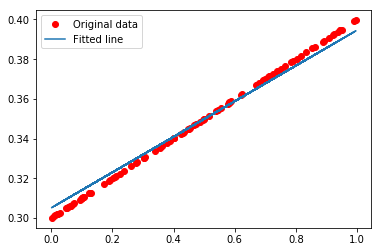

(100, array([ 0.09410392], dtype=float32), array([ 0.30288917], dtype=float32))


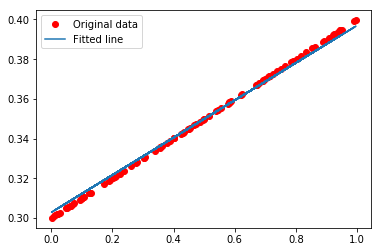

(120, array([ 0.09669355], dtype=float32), array([ 0.30162024], dtype=float32))


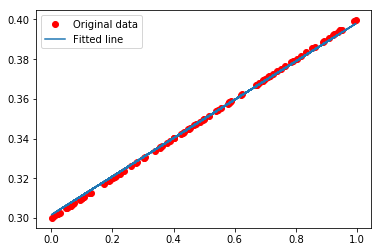

(140, array([ 0.09814578], dtype=float32), array([ 0.3009086], dtype=float32))


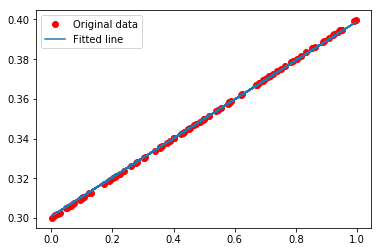

(160, array([ 0.09896018], dtype=float32), array([ 0.30050954], dtype=float32))


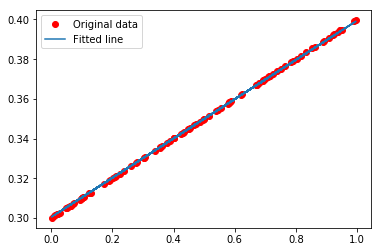

(180, array([ 0.0994169], dtype=float32), array([ 0.30028576], dtype=float32))


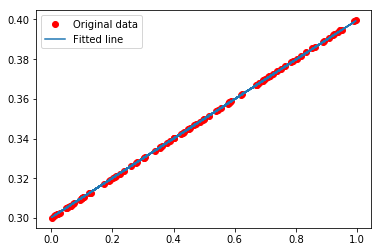

(200, array([ 0.099673], dtype=float32), array([ 0.30016023], dtype=float32))


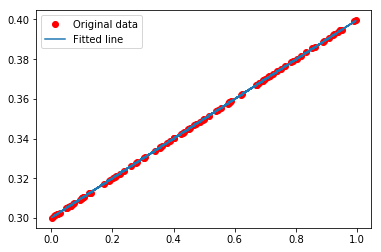

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 用 numpy 亂數產生 100 個點，並且
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but TensorFlow will
# figure that out for us.) 
# 等等 tensorflow 幫我們慢慢地找出 fitting 的權重值

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.2)
train = optimizer.minimize(loss)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.global_variables_initializer()

# Launch the graph.
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))
        plt.plot(x_data, y_data, 'ro', label='Original data')
        plt.plot(x_data, sess.run(W) * x_data + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()

# Learns best fit is W: [0.1], b: [0.3]